<a href="https://colab.research.google.com/github/vespiacic/ISAA/blob/main/ADSS_refactored.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install astroquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.transforms import Bbox
import PIL
import urllib
from astropy.time import Time
from astroquery.jplhorizons import Horizons

In [ ]:
epochs = {
  #'start': '2022-01-01 00:00:00',
  #'start': '2022-11-01 00:00:00',
  'start': '2023-02-01 00:00:00',
  'stop': '2023-02-28 23:59:59',
  # 'stop': '2023-01-19 23:59:59',
  # 'stop': '2023-12-31 23:59:59',
  # 'start': '2023-10-01 00:00:00',
  # 'stop': '2023-11-30 23:59:59',
  # 'stop': '2023-11-01 23:59:59',
  # 'stop': '2022-11-30 23:59:59',
  # 'stop': '2022-12-31 23:59:59',
  # 'stop': '2022-11-10 23:59:59',
  # 'step': '1h',
  'step': '4h',
  # 'step': '10d',
  # 'step': '1d'
}

frame_limit = 2.25#1.8 #distanza dal sole in au da mappare

#Serve per ottenere quanti frame ci sono nella simulazione e l'indicazione temporale
obj0 = Horizons(id=0, location="@sun", epochs=epochs).vectors()
sim_duration = len(obj0)
print(sim_duration)
#print(obj0.columns)

168


In [ ]:
class SpaceObject:  # definisce i corpi, i 4 pianeti interni e le sonde del sistema solare
  def __init__(self, nasaid, name, color, **kwargs) :
    self.nasaid = nasaid
    self.name = name
    self.color = color
    
    self.rad = kwargs.get('rad', 1.0)
    self.linewidth = kwargs.get('linewidth', 1.0)
    self.linestyle = kwargs.get('linestyle', '-')
    self.fontsize = kwargs.get('fontsize', 18)
    self.horizontalalignment = kwargs.get('horizontalalignment', 'left')
    self.verticalalignment = kwargs.get('verticalalignment', 'bottom')

    self.xs = []
    self.ys = []

  def retrieve_coords(self, epochs) :
    obj = Horizons(id=self.nasaid, location="@sun", epochs=epochs).vectors()
    self.xs= np.double(obj['x'])
    self.ys= np.double(obj['y'])
    print(self.nasaid, self.name, obj['targetname'][0])


class Planet(SpaceObject) :
  def __init__(self, nasaid, name, color, **kwargs) :
    super().__init__(nasaid, name, color, rad=8.0, linewidth=4, **kwargs)

class MinorBody(SpaceObject) :
  def __init__(self, nasaid, name, color, **kwargs) :
    super().__init__(nasaid, name, color, rad=3.5, linewidth=2, **kwargs)

class Spacecraft(SpaceObject) :
  def __init__(self, nasaid, name, color, **kwargs) :
    super().__init__(nasaid, name, color, rad=3.5, linewidth=2, linestyle='dashed', **kwargs)

In [ ]:
planets = [
  Planet(199, 'Mercurio', 'gray', 
      horizontalalignment='right', verticalalignment='top'),
  
  Planet(299, 'Venere:\nAkatsuki', 'orange',
       horizontalalignment='right',
  ),
  
  #Luna: 8: Chang'e 3, Chang'e 4, Chang'e 5, THEMIS-ARTEMIS, LRO, Chandrayaan, CAPSTONE, KPLO
  #L1: 4: ACE, Wind, Soho, DSCOVR
  #L2: 3: Gaia, Spektr-RG, Webb
  #'Luna-L₁-L₂:\n24 missioni'
  Planet(3, 'Luna: 17\nL₁-L₂: 7', 'cyan',
      horizontalalignment='right', verticalalignment='top'),

  #Marte: 10: Odyssey, MRO, MAVEN, Mars Express, TGO, Tianwen-1, Hope, MOM, Perseverance, Curiosity
  # Planet(4, 'Marte:\n9 missioni', 'chocolate', verticalalignment='top'),
  Planet(499, 'Marte: 9', 'chocolate', verticalalignment='top'),
]

minor_bodies = [
  # MinorBody(90000698, '67P', 'white', verticalalignment='top'),
  # MinorBody(162173, 'Ryugu', 'white', verticalalignment='top'),
  # MinorBody(2101955, 'Bennu', 'white', verticalalignment='top'),
  # MinorBody(52246, 'Donaldjohanson', 'white', verticalalignment='top'),
  # MinorBody(90004676, 'Neanderthal', 'white', 
  #           horizontalalignment='right', verticalalignment='top'),
  MinorBody(50001317, '1998 KY₂₆', 'white', verticalalignment='top'),
  MinorBody(152830, '1999 VD₅₇', 'white', verticalalignment='top'),
  # MinorBody(90000920, '96P', 'white', horizontalalignment='right'),
]

spacecrafts = [
  Spacecraft(-49, 'Lucy', 'white', verticalalignment='top'),
  Spacecraft(-96, 'Parker Solar Probe', 'yellow'),
  Spacecraft(-144, 'Solar Orbiter', 'yellow', verticalalignment='top'),
  Spacecraft(-37, 'Hayabusa 2#', 'white', 
      horizontalalignment='right',# verticalalignment='top',
  ),
  Spacecraft(-121, 'BepiColombo', 'gray'),#, verticalalignment='top'),
  Spacecraft(-64, 'Osiris-REx', 'white'),
  Spacecraft(-234, 'Stereo A', 'yellow', horizontalalignment='right'),
  Spacecraft(-61, 'Juno', 'white'),
  Spacecraft(-98, 'New Horizons', 'white'),
  Spacecraft(-31, 'Voyager 1', 'white'),
  Spacecraft(-32, 'Voyager 2', 'white'),

  # Spacecraft(20065803, 'LICIACube', 'white', horizontalalignment='right'),
  # Spacecraft(-170, 'Webb', 'cyan'),
  # Spacecraft(-164, 'Lunar Flashlight', 'cyan'),
]

every_body = planets + minor_bodies + spacecrafts

In [ ]:
#Ottieni coordinate corpi
for corpo in every_body:
  corpo.retrieve_coords(epochs=epochs)


199 Mercurio Mercury (199)
299 Venere:
Akatsuki Venus (299)
3 Luna: 17
L₁-L₂: 7 Earth-Moon Barycenter (3)
499 Marte: 9 Mars (499)
50001317 1998 KY₂₆ (1998 KY26)
152830 1999 VD₅₇ 152830 (1999 VD57)
-49 Lucy Lucy (spacecraft) (-49)
-96 Parker Solar Probe Parker Solar Probe (spacecraft)
-144 Solar Orbiter Solar Orbiter (spacecraft) (-144
-37 Hayabusa 2# Hayabusa 2 (spacecraft) (-37)
-121 BepiColombo BepiColombo (Spacecraft) (-121)
-64 Osiris-REx OSIRIS-REx (spacecraft) (-64)
-234 Stereo A STEREO-A (spacecraft) (-234)
-61 Juno Juno (spacecraft) (-61)
-98 New Horizons New Horizons (spacecraft) (-98)
-31 Voyager 1 Voyager 1 (spacecraft) (-31)
-32 Voyager 2 Voyager 2 (spacecraft) (-32)


In [ ]:
#logo ISAA
logo_url = 'https://isaastatic.ams3.digitaloceanspaces.com/banner_img/isaa.png'
logo = np.array(PIL.Image.open(urllib.request.urlopen(logo_url)))
(logo_h, logo_w, _) = logo.shape
logo_scale_ratio = 1080/(2*frame_limit) #300 px/ua
logo_offset = -frame_limit + 0.1 #-1.75
#Posizione e dimensione logo in UA
logo_extent = (
    logo_offset,
    logo_offset + logo_w / logo_scale_ratio,
    logo_offset,
    logo_offset + logo_h / logo_scale_ratio
)
#logo_extent = None


In [ ]:
def animate(i):

  ax.clear()
  ax.set_aspect('equal')
  ax.axis('off')
  ax.set_xlim(-frame_limit, frame_limit)
  ax.set_ylim(-frame_limit, frame_limit)

  #Disegna l'intestazione con la data
  ax.text(.03, .95, 
      Time(obj0['datetime_jd'][i], format='jd').strftime('Giorno: %Y-%m-%d'),# %H'),
      color='white', transform=ax.transAxes, fontsize=24
  )

  #Disegna il Sole
  ax.scatter(0, 0, color='yellow', s=225, edgecolors=None, zorder=0)
  ax.annotate('Sole', xy=(0,0), xytext=(0,0.05), fontsize=18,
              color='yellow',
              #bbox=dict(boxstyle='square,pad=0.1', fc='none', ec='none')
            )
  
  #Inserisci logo
  #ax.imshow(logo, extent=logo_extent)#, interpolation='none', resample=False)
  
  #return

  for p in every_body:
    if abs(p.xs[i]) < frame_limit and abs(p.ys[i]) < frame_limit: # il caso di un corpo dentro l'area visualizzate
      #Disegna l'orbita completa
      #ax.plot(p.xs, p.ys, color=p.color, linewidth=p.linewidth/2, linestyle='dotted')
      # ax.plot(p.xs, p.ys, color=p.color, linewidth=p.linewidth, linestyle=p.linestyle, alpha=0.25)

      #Disegna l'orbita
      ax.plot(p.xs[0:i+1], p.ys[0:i+1], color=p.color, linewidth=p.linewidth, linestyle=p.linestyle)
      
      #Disegna la posizione
      ax.scatter(p.xs[i], p.ys[i], color=p.color, s=p.rad**2, edgecolors=None, zorder=10)
      
      #Aggiunngi l'etichetta
      xtxt = p.xs[i] + .01 * ( -1 if p.horizontalalignment=='right' else 1)
      ytxt = p.ys[i] + .01 * ( -1 if p.verticalalignment=='top' else 1)
      ax.annotate(p.name,
          xy=(p.xs[i],p.ys[i]),
          xytext=(xtxt,ytxt),
          fontsize=p.fontsize,
          horizontalalignment=p.horizontalalignment,
          verticalalignment=p.verticalalignment,
          color=p.color,
          #bbox=dict(boxstyle='square,pad=0', fc='red', ec='none')
      )
    else : # le 4 sonde nel sistema solare esterno
      # distance = (p.xs[i]**2+p.ys[i]**2)**.5
      theta = np.arctan2(p.ys[i], p.xs[i])
      start_f = 0.75
      end_f = 0.9
      if p.name == 'New Horizons' : #da usare solo fin quando New Horizons e Voyager 2 sono quasi allineati col Sole
        start_f = start_f - 0.1
        end_f = end_f - 0.1
      inizio = (start_f * frame_limit * np.cos(theta), start_f * frame_limit * np.sin(theta))
      fine = (end_f * frame_limit * np.cos(theta), end_f * frame_limit * np.sin(theta))

      freccia = ax.annotate(
          p.name,
          xy = inizio, xytext = fine,
          fontsize = p.fontsize,
          horizontalalignment = 'center',
          arrowprops = {
            'arrowstyle': '<-',
            'color': p.color,
            'lw': p.linewidth * 0.85,
            'ls': p.linestyle
          },
      )
    
#  return []


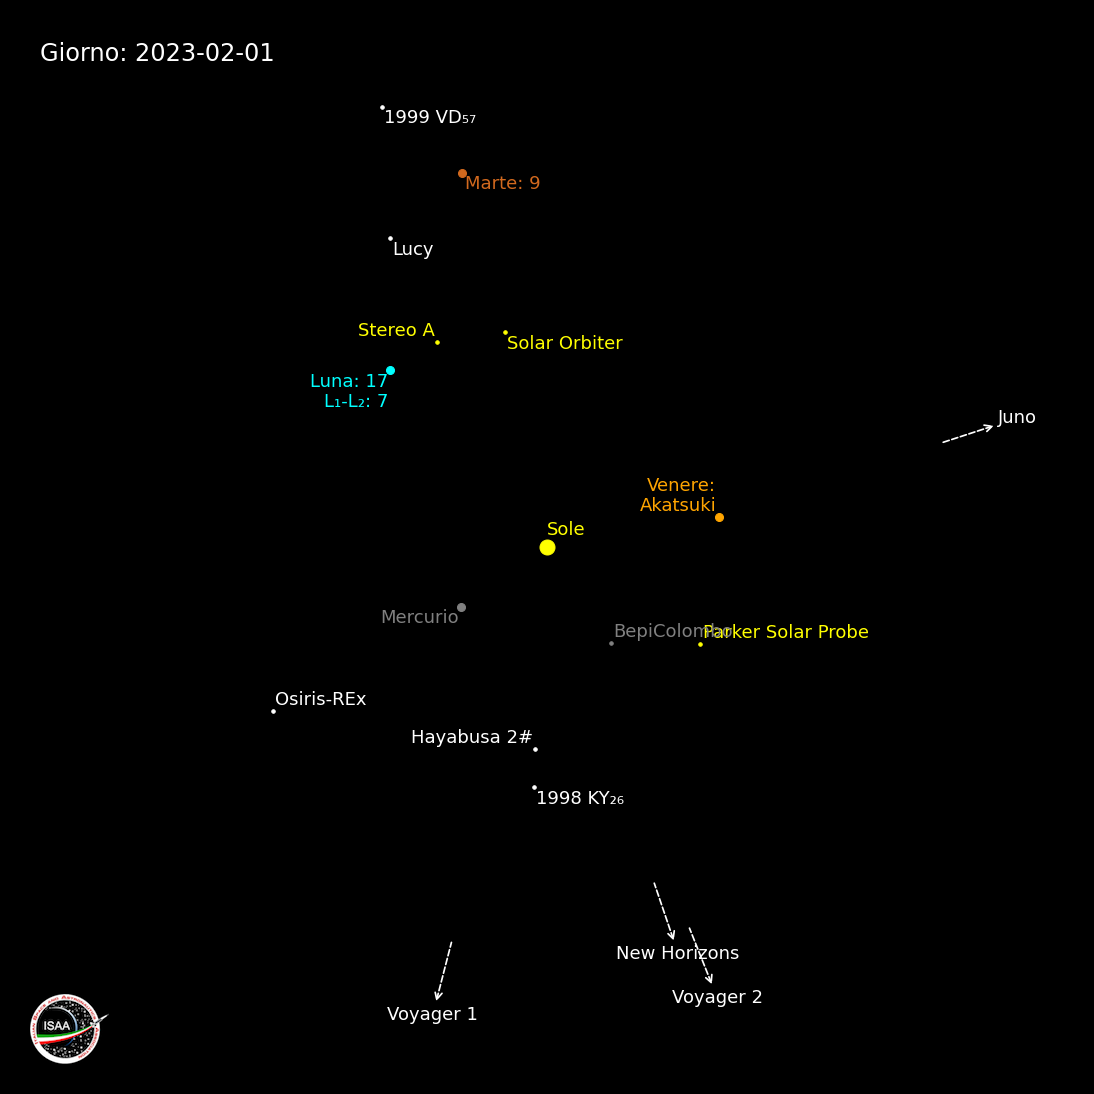

In [ ]:
plt.style.use('dark_background')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,15))
# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(1920/72,15))
# ax = axs[0]
fig.figimage(logo, xo=30, yo=30)
plt.subplots_adjust(left=0, top=1, right=1, bottom=0)
plt.margins(0)

ani = animation.FuncAnimation(
    fig,
    animate,
    repeat=False,
    frames=sim_duration,
)

#plt.show() #output IDE

#writergif = animation.PillowWriter(fps=7)   #output gif scrittura
#ani.save('solarsystem.gif', writer=writergif) #output gif file

writervideo = animation.FFMpegWriter(fps=30)  #output mp4 writer
ani.save('adss202302.mp4', writer=writervideo, dpi=72) #output mp4 file